# 설정

In [22]:
import sys

import pandas as pd

assert sys.version_info >= (3,5)

In [23]:
import sklearn
assert sklearn.__version__>= "0.20"

In [24]:
def prepare_country_stats(oecd_bli, gdp_per_capita):
    oecd_bli = oecd_bli[oecd_bli["INEQUALITY"] == "TOT"]
    oecd_bli = oecd_bli.pivot(index= "Country",columns="Indicator",values="Value")
    gdp_per_capita.rename(columns = {"2015":"GDP per capita"},inplace= True)
    gdp_per_capita.set_index("Country",inplace=True)
    full_country_stats = pd.merge(left=oecd_bli,right=gdp_per_capita,left_index=True, right_index=True)
    full_country_stats.sort_values(by="GDP per capita",inplace=True)
    remove_indices = [0,1,6,8,33,34,35]
    keep_indices = list(set(range(36)) - set(remove_indices))
    return full_country_stats[["GDP per capita", "Life satisfaction"]].iloc[keep_indices]

# 데이터 불러오기

In [25]:
import os
datapath = os.path.join("datasets","lifesat","") 

In [26]:
datapath #data 경로 설정

'datasets\\lifesat\\'

In [27]:
%matplotlib inline # 그래프 label 설정
import matplotlib as mpl
mpl.rc('axes',labelsize = 16)
mpl.rc('xtick',labelsize = 12)
mpl.rc('ytick',labelsize = 12)

UsageError: unrecognized arguments: # 그래프 label 설정


In [30]:
import urllib #github를 통해 직접 다운
DOWNLOAD_ROOT = "https://raw.githubusercontent.com/rickiepark/handson-ml2/master/"
os.makedirs(datapath,exist_ok=True)
for filename in ("oecd_bli_2015.csv", "gdp_per_capita.csv"):
    print("DOWNLOADING",filename)
    url = DOWNLOAD_ROOT + "datasets/lifesat/" + filename
    urllib.request.urlretrieve(url,datapath+filename)

DOWNLOADING oecd_bli_2015.csv
DOWNLOADING gdp_per_capita.csv


In [31]:
# 데이터 불러오기

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import sklearn.linear_model

oecd_bil = pd.read_csv(datapath + "oecd_bli_2015.csv",thousands=',')
gdp_per_capita = pd.read_csv(datapath + "gdp_per_capita.csv",thousands=',' , delimiter = "\t", encoding= 'latin1', na_values= "n/a")

In [32]:
oecd_bil

,LOCATION,Country,INDICATOR,Indicator,MEASURE,Measure,INEQUALITY,Inequality,Unit Code,Unit,PowerCode Code,PowerCode,Reference Period Code,Reference Period,Value,Flag Codes,Flags
0,AUS,Australia,HO_BASE,Dwellings without basic facilities,L,Value,TOT,Total,PC,Percentage,0,units,NaN,NaN,1.10,E,Estimated value
1,AUT,Austria,HO_BASE,Dwellings without basic facilities,L,Value,TOT,Total,PC,Percentage,0,units,NaN,NaN,1.00,NaN,NaN
2,BEL,Belgium,HO_BASE,Dwellings without basic facilities,L,Value,TOT,Total,PC,Percentage,0,units,NaN,NaN,2.00,NaN,NaN
3,CAN,Canada,HO_BASE,Dwellings without basic facilities,L,Value,TOT,Total,PC,Percentage,0,units,NaN,NaN,0.20,NaN,NaN
4,CZE,Czech Republic,HO_BASE,Dwellings without basic facilities,L,Value,TOT,Total,PC,Percentage,0,units,NaN,NaN,0.90,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3287,EST,Estonia,WL_TNOW,Time devoted to leisure and personal care,L,Value,WMN,Women,HOUR,Hours,0,units,NaN,NaN,14.43,NaN,NaN
3288,ISR,Israel,WL_TNOW,Time devoted to leisure and personal care,L,Value,WMN,Women,HOUR,Hours,0,units,NaN,NaN,14.24,E,Estimated value
3289,RUS,Russia,WL_TNOW,Time devoted to leisure and personal care,L,Value,WMN,Women,HOUR,Hours,0,units,NaN,NaN,14.75,E,Estimated value
3290,SVN,Slovenia,WL_TNOW,Time devoted to leisure and personal care,L,Value,WMN,Women,HOUR,Hours,0,units,NaN,NaN,14.12,NaN,NaN


In [33]:
country_stats = prepare_country_stats(oecd_bil,gdp_per_capita)

In [34]:
country_stats.head()

,GDP per capita,Life satisfaction
Country,,
Russia,9054.914,6.0
Turkey,9437.372,5.6
Hungary,12239.894,4.9
Poland,12495.334,5.8
Slovak Republic,15991.736,6.1


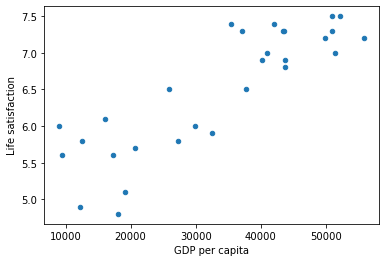

In [35]:
# capita 별 GDP 좋을 수록 삶의 만족도가 높다.
X = np.c_[country_stats["GDP per capita"]]
y = np.c_[country_stats["Life satisfaction"]]

country_stats.plot(kind='scatter',x = "GDP per capita", y = "Life satisfaction")
plt.show()

In [36]:
model = sklearn.linear_model.LinearRegression() # 단순한 선형회귀 모델 불러오기

model.fit(X,y)

X_new = [[22587]]
print(model.predict(X_new))

[[5.96242338]]


In [37]:
model

LinearRegression()

# EDA

In [38]:
## 그림을 저장할 위치
PROJECT_ROOT_DIR = ","
CHAPTER_ID = "end_to_end_project"
IMAGES_PATH = os.path.join(PROJECT_ROOT_DIR,"images",CHAPTER_ID)
os.makedirs(IMAGES_PATH,exist_ok=True) # 저장 위치

def save_fig(fig_id, tight_layout = True, fig_extension = 'png', resolution = 300):
    path = os.path.join(IMAGES_PATH,fig_id + "." + fig_extension)
    print('그림 저장' , fig_id)
    if tight_layout:
        plt.tight_layout()
    plt.savefig(path, format = fig_extension, dpi = resolution)

#import warnings
#warnings.filterwarnings(action= 'ignore', message=)

In [39]:
import tarfile

DOWNLOAD_ROOT = "https://raw.githubusercontent.com/rickiepark/handson-ml2/master/"
HOUSING_PATH = os.path.join('datasets','housing')
HOUSING_URL = DOWNLOAD_ROOT + 'datasets/housing/housing.tgz'

def fetch_housing_data(housing_url = HOUSING_URL, housing_path = HOUSING_PATH):
    if not os.path.isdir(housing_path):
        os.makedirs(housing_path)
    tgz_path = os.path.join(housing_path,'housing.tgz')
    urllib.request.urlretrieve(housing_url,tgz_path)
    housing_tgz = tarfile.open(tgz_path)
    housing_tgz.extractall(path=housing_path)
    housing_tgz.close()

In [40]:
fetch_housing_data()

In [41]:
import pandas as pd

def load_housing_data(housing_path = HOUSING_PATH):
    csv_path = os.path.join(housing_path,'housing.csv')
    return pd.read_csv(csv_path)

In [42]:
housing = load_housing_data()
housing.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


In [43]:
housing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


In [44]:
housing.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,20640.000000,20640.000000,20640.000000,20640.000000,20433.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,-119.569704,35.631861,28.639486,2635.763081,537.870553,1425.476744,499.539680,3.870671,206855.816909
std,2.003532,2.135952,12.585558,2181.615252,421.385070,1132.462122,382.329753,1.899822,115395.615874
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,-121.800000,33.930000,18.000000,1447.750000,296.000000,787.000000,280.000000,2.563400,119600.000000
50%,-118.490000,34.260000,29.000000,2127.000000,435.000000,1166.000000,409.000000,3.534800,179700.000000
75%,-118.010000,37.710000,37.000000,3148.000000,647.000000,1725.000000,605.000000,4.743250,264725.000000
max,-114.310000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


그림 저장 attribute_histogram_plots


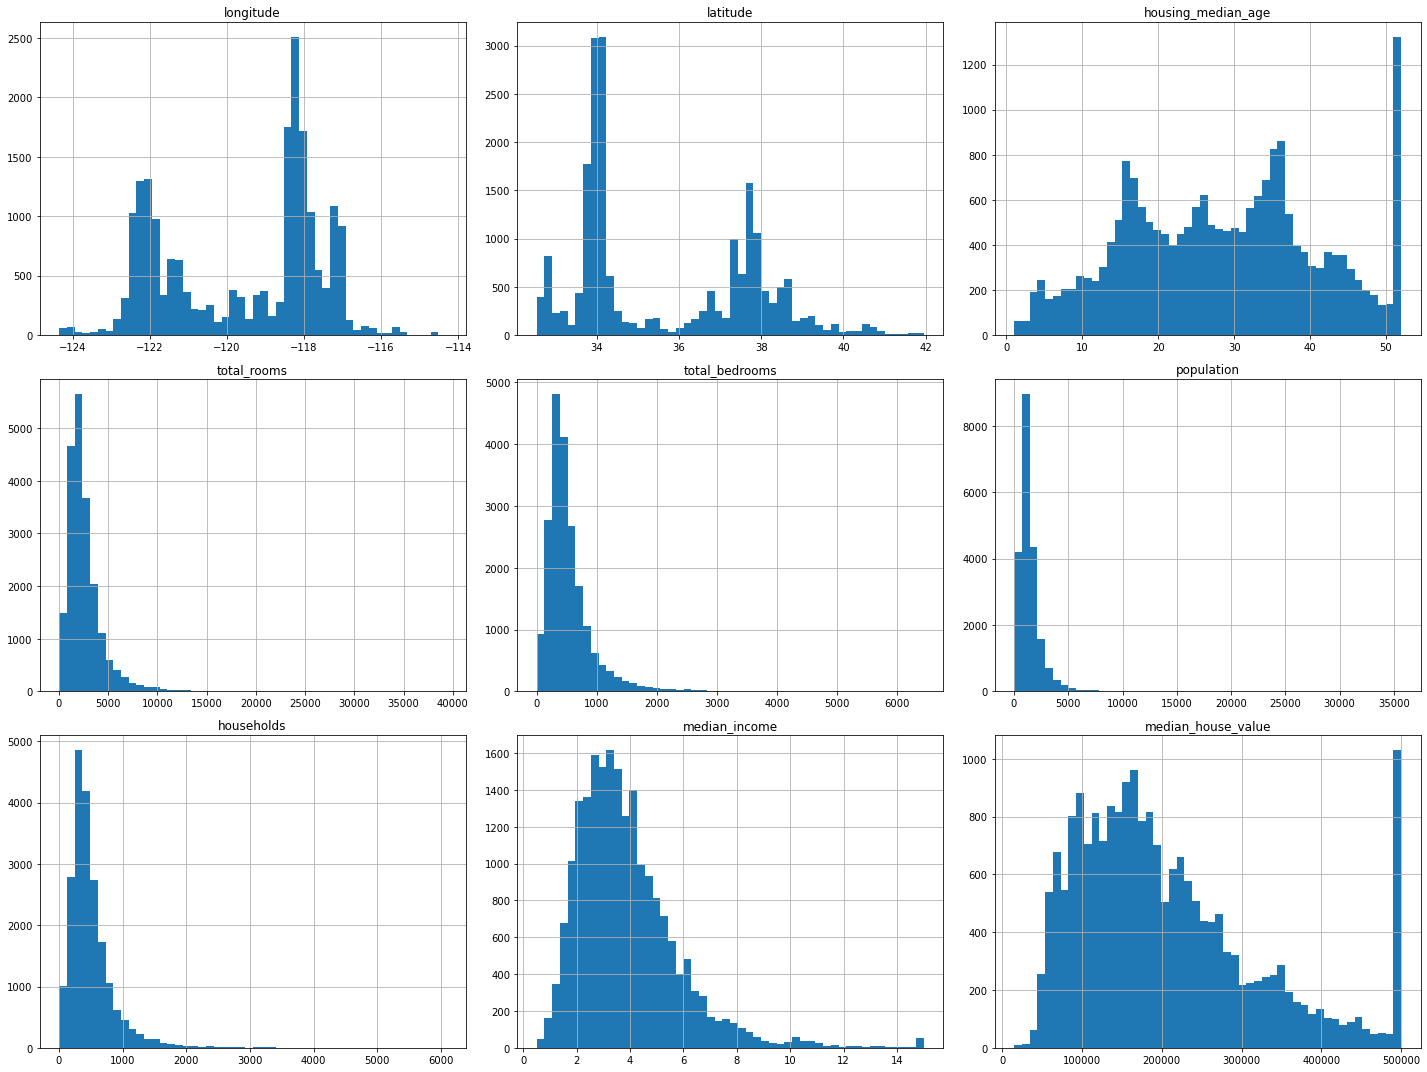

In [45]:
%matplotlib inline

housing.hist(bins=50,figsize=(20,15))
save_fig("attribute_histogram_plots")
plt.show()

In [46]:
np.random.seed(42) # 결과가 동일하도록

In [47]:
def split_train_test(data,test_ratio):
    shuffled_indices = np.random.permutation(len(data))
    test_set_size = int(len(data) * test_ratio)
    test_indices = shuffled_indices[:test_set_size]
    train_indices = shuffled_indices[test_set_size:]
    return data.iloc[train_indices], data.iloc[test_indices]

In [48]:
train_set, test_set = split_train_test(housing, (0.2))
len(test_set)

4128

In [49]:
from sklearn.model_selection import train_test_split

train_set.test_set = train_test_split(housing, test_size= 0.2, random_state= 42)

<ipython-input-49-67602f08c373>:3: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
  train_set.test_set = train_test_split(housing, test_size= 0.2, random_state= 42)


In [50]:
test_set.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
20046,-119.01,36.06,25.0,1505.0,NaN,1392.0,359.0,1.6812,47700.0,INLAND
3024,-119.46,35.14,30.0,2943.0,NaN,1565.0,584.0,2.5313,45800.0,INLAND
15663,-122.44,37.80,52.0,3830.0,NaN,1310.0,963.0,3.4801,500001.0,NEAR BAY
20484,-118.72,34.28,17.0,3051.0,NaN,1705.0,495.0,5.7376,218600.0,<1H OCEAN
9814,-121.93,36.62,34.0,2351.0,NaN,1063.0,428.0,3.7250,278000.0,NEAR OCEAN


<AxesSubplot:>

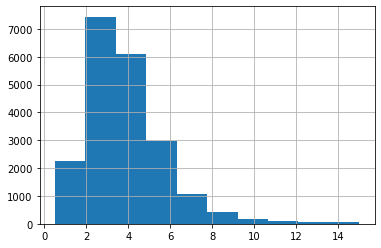

In [51]:
housing['median_income'].hist()

In [52]:
housing['income_cat'] = pd.cut(housing['median_income'], bins=[0, 1.5, 3.0, 4.5, 6., np.inf], labels=[1,2,3,4,5])

In [53]:
housing['income_cat'].value_counts()

3    7236
2    6581
4    3639
5    2362
1     822
Name: income_cat, dtype: int64

In [54]:
from sklearn.model_selection import StratifiedShuffleSplit  
## 각 라벨별로 비율을 맞춰서 train, test 를 뽑아준다.

split = StratifiedShuffleSplit(n_splits=1, test_size= 0.2, random_state= 42)
for train_index, test_index in split.split(housing,housing['income_cat']):
    strat_train_set = housing.loc[train_index]
    strat_test_set = housing.loc[test_index]

In [55]:
housing['income_cat']

0        5
1        5
2        5
3        4
4        3
        ..
20635    2
20636    2
20637    2
20638    2
20639    2
Name: income_cat, Length: 20640, dtype: category
Categories (5, int64): [1 < 2 < 3 < 4 < 5]

In [56]:
strat_test_set['income_cat'].value_counts()

3    1447
2    1316
4     728
5     473
1     164
Name: income_cat, dtype: int64

In [57]:
housing["income_cat"].value_counts() / len(housing)

3    0.350581
2    0.318847
4    0.176308
5    0.114438
1    0.039826
Name: income_cat, dtype: float64

In [58]:
def income_cat_proportions(data):
    return data["income_cat"].value_counts() / len(data)

train_set, test_set = train_test_split(housing, test_size=0.2, random_state=42)

compare_props = pd.DataFrame({
    "Overall": income_cat_proportions(housing),
    "Stratified": income_cat_proportions(strat_test_set),
    "Random": income_cat_proportions(test_set),
}).sort_index()
compare_props["Rand. %error"] = 100 * compare_props["Random"] / compare_props["Overall"] - 100
compare_props["Strat. %error"] = 100 * compare_props["Stratified"] / compare_props["Overall"] - 100

# 데이터 이해를 위한 탐색과 시각화

In [59]:
# Download the California image
images_path = os.path.join(PROJECT_ROOT_DIR, "images", "end_to_end_project")
os.makedirs(images_path, exist_ok=True)
DOWNLOAD_ROOT = "https://raw.githubusercontent.com/ageron/handson-ml2/master/"
filename = "california.png"
print("Downloading", filename)
url = DOWNLOAD_ROOT + "images/end_to_end_project/" + filename
urllib.request.urlretrieve(url, os.path.join(images_path, filename))

(',\\images\\end_to_end_project\\california.png',
 <http.client.HTTPMessage at 0x214b292bdc0>)

그림 저장 california_housing_prices_plot


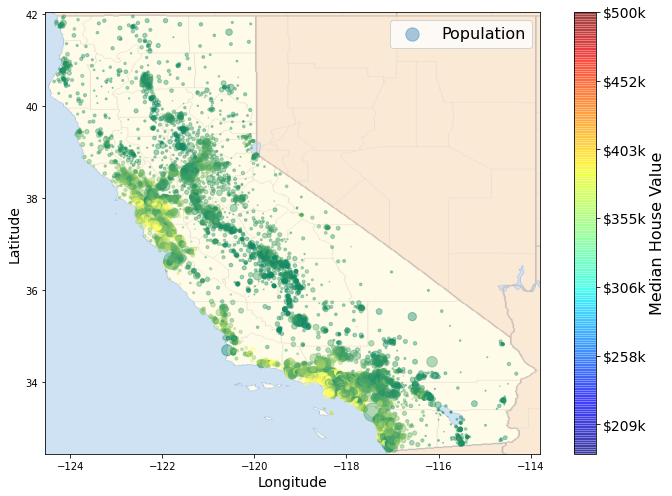

In [60]:
import matplotlib.image as mpimg
california_img=mpimg.imread(os.path.join(images_path, filename))
ax = housing.plot(kind="scatter", x="longitude", y="latitude", figsize=(10,7),
                       s=housing['population']/100, label="Population",
                       c="median_house_value", cmap=plt.get_cmap("summer"),
                       colorbar=False, alpha=0.4,
                      )
plt.imshow(california_img, extent=[-124.55, -113.80, 32.45, 42.05], alpha=0.5,
           cmap=plt.get_cmap("jet"))
plt.ylabel("Latitude", fontsize=14)
plt.xlabel("Longitude", fontsize=14)

prices = housing["median_house_value"]
tick_values = np.linspace(prices.min(), prices.max(), 11)
cbar = plt.colorbar(ticks=tick_values/prices.max())
cbar.ax.set_yticklabels(["$%dk"%(round(v/1000)) for v in tick_values], fontsize=14)
cbar.set_label('Median House Value', fontsize=16)

plt.legend(fontsize=16)
save_fig("california_housing_prices_plot")
plt.show()

In [61]:
# from pandas.tools.plotting import scatter_matrix # 옛날 버전의 판다스에서는 
from pandas.plotting import scatter_matrix ## 상관관계

attributes = ["median_house_value", "median_income", "total_rooms",
              "housing_median_age"]

In [62]:
housing["rooms_per_household"] = housing["total_rooms"]/housing["households"]
housing["bedrooms_per_room"] = housing["total_bedrooms"]/housing["total_rooms"]
housing["population_per_household"]=housing["population"]/housing["households"]

## 변수간의 다중공산성 문제를 제거하기 위해 사용
## 딥러닝에서는 사용
## 머신러닝에서는 사용하지만 딥러닝은 따로 사용하지 않는다. 

# 머신러닝 알고리즘을 위한 데이터 준비

In [63]:
housing

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity,income_cat,rooms_per_household,bedrooms_per_room,population_per_household
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY,5,6.984127,0.146591,2.555556
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY,5,6.238137,0.155797,2.109842
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY,5,8.288136,0.129516,2.802260
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY,4,5.817352,0.184458,2.547945
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY,3,6.281853,0.172096,2.181467
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20635,-121.09,39.48,25.0,1665.0,374.0,845.0,330.0,1.5603,78100.0,INLAND,2,5.045455,0.224625,2.560606
20636,-121.21,39.49,18.0,697.0,150.0,356.0,114.0,2.5568,77100.0,INLAND,2,6.114035,0.215208,3.122807
20637,-121.22,39.43,17.0,2254.0,485.0,1007.0,433.0,1.7000,92300.0,INLAND,2,5.205543,0.215173,2.325635
20638,-121.32,39.43,18.0,1860.0,409.0,741.0,349.0,1.8672,84700.0,INLAND,2,5.329513,0.219892,2.123209


In [64]:
housing_labels = housing["median_house_value"].copy()

In [65]:
from sklearn.impute import SimpleImputer
imputer = SimpleImputer(strategy="median")

In [66]:
housing_num = housing.drop("ocean_proximity",axis = 1)

In [67]:
imputer.fit(housing_num)

SimpleImputer(strategy='median')

In [68]:
imputer.statistics_

array([-1.18490000e+02,  3.42600000e+01,  2.90000000e+01,  2.12700000e+03,
        4.35000000e+02,  1.16600000e+03,  4.09000000e+02,  3.53480000e+00,
        1.79700000e+05,  3.00000000e+00,  5.22912879e+00,  2.03162434e-01,
        2.81811565e+00])

In [69]:
housing_num.median().values

array([-1.18490000e+02,  3.42600000e+01,  2.90000000e+01,  2.12700000e+03,
        4.35000000e+02,  1.16600000e+03,  4.09000000e+02,  3.53480000e+00,
        1.79700000e+05,  5.22912879e+00,  2.03162434e-01,  2.81811565e+00])

In [70]:
X = imputer.transform(housing_num)
housing_tr =pd.DataFrame(X, columns=housing_num.columns, index=housing_num.index)

In [71]:
housing_tr

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,income_cat,rooms_per_household,bedrooms_per_room,population_per_household
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,5.0,6.984127,0.146591,2.555556
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,5.0,6.238137,0.155797,2.109842
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,5.0,8.288136,0.129516,2.802260
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,4.0,5.817352,0.184458,2.547945
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,3.0,6.281853,0.172096,2.181467
...,...,...,...,...,...,...,...,...,...,...,...,...,...
20635,-121.09,39.48,25.0,1665.0,374.0,845.0,330.0,1.5603,78100.0,2.0,5.045455,0.224625,2.560606
20636,-121.21,39.49,18.0,697.0,150.0,356.0,114.0,2.5568,77100.0,2.0,6.114035,0.215208,3.122807
20637,-121.22,39.43,17.0,2254.0,485.0,1007.0,433.0,1.7000,92300.0,2.0,5.205543,0.215173,2.325635
20638,-121.32,39.43,18.0,1860.0,409.0,741.0,349.0,1.8672,84700.0,2.0,5.329513,0.219892,2.123209


In [72]:
housing_cat = housing[['ocean_proximity']]
housing_cat.head(10)

,ocean_proximity
0,NEAR BAY
1,NEAR BAY
2,NEAR BAY
3,NEAR BAY
4,NEAR BAY
5,NEAR BAY
6,NEAR BAY
7,NEAR BAY
8,NEAR BAY
9,NEAR BAY


In [73]:
from sklearn.preprocessing import OrdinalEncoder

ordinal_encoder = OrdinalEncoder()
housing_cat_encoded = ordinal_encoder.fit_transform(housing_cat)
housing_cat_encoded[:5]

array([[3.],
       [3.],
       [3.],
       [3.],
       [3.]])

In [74]:
ordinal_encoder.categories_

[array(['<1H OCEAN', 'INLAND', 'ISLAND', 'NEAR BAY', 'NEAR OCEAN'],
       dtype=object)]

In [75]:
from sklearn.preprocessing import OneHotEncoder

cat_encoder = OneHotEncoder(sparse=False)  # sparse 의 경우 toarray 를 안해도 된다.
# 결과값이 sparse matrix 형태로 출력이 되기때문에 False 로 해서 하기
housing_cat_1hot = cat_encoder.fit_transform(housing_cat)
housing_cat_1hot

array([[0., 0., 0., 1., 0.],
       [0., 0., 0., 1., 0.],
       [0., 0., 0., 1., 0.],
       ...,
       [0., 1., 0., 0., 0.],
       [0., 1., 0., 0., 0.],
       [0., 1., 0., 0., 0.]])

In [76]:
# housing_cat_1hot.toarray()  ## toarray() 로 하면 보통 해결이 잘되더라...

In [77]:
from sklearn.base import BaseEstimator, TransformerMixin

# 열 인덱스
rooms_ix, bedrooms_ix, population_ix, households_ix = 3, 4, 5, 6

class CombinedAttributesAdder(BaseEstimator, TransformerMixin):
    def __init__(self, add_bedrooms_per_room = True): # *args 또는 **kargs 없음
        self.add_bedrooms_per_room = add_bedrooms_per_room
    def fit(self, X, y=None):
        return self  # 아무것도 하지 않습니다
    def transform(self, X):
        rooms_per_household = X[:, rooms_ix] / X[:, households_ix]
        population_per_household = X[:, population_ix] / X[:, households_ix]
        if self.add_bedrooms_per_room:
            bedrooms_per_room = X[:, bedrooms_ix] / X[:, rooms_ix]
            return np.c_[X, rooms_per_household, population_per_household,
                         bedrooms_per_room]
        else:
            return np.c_[X, rooms_per_household, population_per_household]

attr_adder = CombinedAttributesAdder(add_bedrooms_per_room=False)
housing_extra_attribs = attr_adder.transform(housing.to_numpy())

In [78]:
housing_extra_attribs = pd.DataFrame(housing_extra_attribs,columns=list(housing.columns) + ["rooms_per_household","population_per_household"],index= housing.index)
housing_extra_attribs.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity,income_cat,rooms_per_household,bedrooms_per_room,population_per_household,rooms_per_household,population_per_household
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY,5,6.984127,0.146591,2.555556,6.984127,2.555556
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY,5,6.238137,0.155797,2.109842,6.238137,2.109842
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY,5,8.288136,0.129516,2.80226,8.288136,2.80226
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY,4,5.817352,0.184458,2.547945,5.817352,2.547945
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY,3,6.281853,0.172096,2.181467,6.281853,2.181467


In [79]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.compose import ColumnTransformer

In [80]:
from sklearn.base import BaseEstimator, TransformerMixin

# 수치형 열과 범주형 열을 선택하기 위한 클래스
class OldDataFrameSelector(BaseEstimator, TransformerMixin):
    def __init__(self, attribute_names):
        self.attribute_names = attribute_names
    def fit(self, X, y=None):
        return self
    def transform(self, X):
        return X[self.attribute_names].values

In [81]:
num_attribs = list(housing_num)
cat_attribs = ["ocean_proximity"]

old_num_pipeline = Pipeline([
        ('selector', OldDataFrameSelector(num_attribs)),
        ('imputer', SimpleImputer(strategy="median")),
        ('attribs_adder', CombinedAttributesAdder()),
        ('std_scaler', StandardScaler()),
    ])

old_cat_pipeline = Pipeline([
        ('selector', OldDataFrameSelector(cat_attribs)),
        ('cat_encoder', OneHotEncoder(sparse=False)),
    ])

In [82]:
from sklearn.pipeline import FeatureUnion

old_full_pipeline = FeatureUnion(transformer_list=[
        ("num_pipeline", old_num_pipeline),
        ("cat_pipeline", old_cat_pipeline),
    ])



In [83]:
old_housing_prepared = old_full_pipeline.fit_transform(housing)
old_housing_prepared

array([[-1.32783522,  1.05254828,  0.98214266, ...,  0.        ,
         1.        ,  0.        ],
       [-1.32284391,  1.04318455, -0.60701891, ...,  0.        ,
         1.        ,  0.        ],
       [-1.33282653,  1.03850269,  1.85618152, ...,  0.        ,
         1.        ,  0.        ],
       ...,
       [-0.8237132 ,  1.77823747, -0.92485123, ...,  0.        ,
         0.        ,  0.        ],
       [-0.87362627,  1.77823747, -0.84539315, ...,  0.        ,
         0.        ,  0.        ],
       [-0.83369581,  1.75014627, -1.00430931, ...,  0.        ,
         0.        ,  0.        ]])

In [84]:
housing_prepared = old_housing_prepared

# 모델 선택과 훈련

In [85]:
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR
from sklearn.model_selection import cross_val_score

In [91]:
from sklearn.svm import SVR

svr_reg = SVR()
svr_reg.fit(housing_prepared,housing_labels)

SVR()

# 모델 세부 튜닝

In [92]:
def display_scores(scores):
    print("점수:", scores)
    print("평균:", scores.mean())
    print("표준 편차:", scores.std())

**노트**: 사이킷런 0.22 버전에서 `n_estimators`의 기본값이 100으로 바뀌기 때문에 향후를 위해 `n_estimators=100`로 지정합니다(책에는 등장하지 않습니다).

In [93]:
from sklearn.model_selection import GridSearchCV

tuned_parameters = [
    {"kernel": ["rbf"], "gamma": [[0.01,0.03,0.1,0.3,1.0,3]], "C": [1.0,3.0,10.0,30.0,100.0]},
    {"kernel": ["linear"], "C": [1,3.0,10.0,30.0]},
]


In [29]:
#print(svr_reg.get_params().keys())

NameError: name 'svr_reg' is not defined

In [ ]:
svr_reg_tuned = GridSearchCV(SVR(),tuned_parameters,cv = 5,scoring="neg_mean_squared_error",verbose=2)
svr_reg_tuned.fit(housing_prepared,housing_labels)

#grid_search = GridSearchCV(
#    SVR(), tuned_parameters, scoring=scores, refit=refit_strategy
#)

Fitting 5 folds for each of 9 candidates, totalling 45 fits
[CV] C=1.0, gamma=[0.01, 0.03, 0.1, 0.3, 1.0, 3], kernel=rbf .........
[CV]  C=1.0, gamma=[0.01, 0.03, 0.1, 0.3, 1.0, 3], kernel=rbf, total=   0.0s
[CV] C=1.0, gamma=[0.01, 0.03, 0.1, 0.3, 1.0, 3], kernel=rbf .........
[CV]  C=1.0, gamma=[0.01, 0.03, 0.1, 0.3, 1.0, 3], kernel=rbf, total=   0.0s
[CV] C=1.0, gamma=[0.01, 0.03, 0.1, 0.3, 1.0, 3], kernel=rbf .........
[CV]  C=1.0, gamma=[0.01, 0.03, 0.1, 0.3, 1.0, 3], kernel=rbf, total=   0.0s
[CV] C=1.0, gamma=[0.01, 0.03, 0.1, 0.3, 1.0, 3], kernel=rbf .........
[CV]  C=1.0, gamma=[0.01, 0.03, 0.1, 0.3, 1.0, 3], kernel=rbf, total=   0.0s
[CV] C=1.0, gamma=[0.01, 0.03, 0.1, 0.3, 1.0, 3], kernel=rbf .........
[CV]  C=1.0, gamma=[0.01, 0.03, 0.1, 0.3, 1.0, 3], kernel=rbf, total=   0.0s
[CV] C=3.0, gamma=[0.01, 0.03, 0.1, 0.3, 1.0, 3], kernel=rbf .........
[CV]  C=3.0, gamma=[0.01, 0.03, 0.1, 0.3, 1.0, 3], kernel=rbf, total=   0.0s
[CV] C=3.0, gamma=[0.01, 0.03, 0.1, 0.3, 1.0, 3], ke

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
C:\Users\yoon9\AppData\Roaming\Python\Python38\site-packages\sklearn\model_selection\_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\yoon9\AppData\Roaming\Python\Python38\site-packages\sklearn\model_selection\_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\yoon9\AppData\Roaming\Python\Python38\site-packages\sklearn\svm\_base.py", line 217, in fit
    fit(X, y, sample_weight, solver_type, kernel, random_seed=seed)
  File "C:\Users\yoon9\AppData\Roaming\Python\Python38\site-packages\sklearn\svm\_base.py", line 268, in _dense_fit
    self._probB, self.fit_status_ = libsvm.fit(
  File "sklearn\svm\_libsvm.pyx", line 59, in sklearn.svm._libsvm.fit
TypeError: must be real number, not list

  warnin

[CV] ............................... C=1, kernel=linear, total=  13.2s
[CV] C=1, kernel=linear ..............................................
[CV] ............................... C=1, kernel=linear, total=  12.9s
[CV] C=1, kernel=linear ..............................................
[CV] ............................... C=1, kernel=linear, total=  12.9s
[CV] C=1, kernel=linear ..............................................
[CV] ............................... C=1, kernel=linear, total=  12.4s
[CV] C=1, kernel=linear ..............................................
[CV] ............................... C=1, kernel=linear, total=  12.5s
[CV] C=3.0, kernel=linear ............................................
[CV] ............................. C=3.0, kernel=linear, total=  12.1s
[CV] C=3.0, kernel=linear ............................................
[CV] ............................. C=3.0, kernel=linear, total=  12.3s
[CV] C=3.0, kernel=linear ............................................
[CV] .

In [ ]:
svr_reg_tuned.best_params_

In [116]:
import joblib
joblib.dump(svr_reg_tuned, "svr_tuned.pkl") # DIFF
#...
#my_model_loaded = joblib.load("my_model.pkl") # DIFF

['svr_tuned.pkl']

In [126]:
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import randint,expon,reciprocal


In [128]:
svr_rd_search = RandomizedSearchCV(SVR(),param_distributions=tuned_parameters,
                               n_iter=10,cv = 5, scoring='neg_mean_squared_error',
                               verbose=3,)

svr_rd_search.fit(housing_prepared,housing_labels)

C:\Users\yoon9\AppData\Roaming\Python\Python38\site-packages\sklearn\model_selection\_search.py:278: UserWarning: The total space of parameters 9 is smaller than n_iter=10. Running 9 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
C:\Users\yoon9\AppData\Roaming\Python\Python38\site-packages\sklearn\model_selection\_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\yoon9\AppData\Roaming\Python\Python38\site-packages\sklearn\model_selection\_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\yoon9\AppData\Roaming\Python\Python38\site-packages\sklearn\svm\_base.py", line 217, in fit
    fit(X, y, sample_weight, solver_type, kernel, random_seed=seed)
  File "C:\Users\yoon9\AppDat

Fitting 5 folds for each of 9 candidates, totalling 45 fits
[CV] kernel=rbf, gamma=[0.01, 0.03, 0.1, 0.3, 1.0, 3], C=1.0 .........
[CV]  kernel=rbf, gamma=[0.01, 0.03, 0.1, 0.3, 1.0, 3], C=1.0, score=nan, total=   0.0s
[CV] kernel=rbf, gamma=[0.01, 0.03, 0.1, 0.3, 1.0, 3], C=1.0 .........
[CV]  kernel=rbf, gamma=[0.01, 0.03, 0.1, 0.3, 1.0, 3], C=1.0, score=nan, total=   0.0s
[CV] kernel=rbf, gamma=[0.01, 0.03, 0.1, 0.3, 1.0, 3], C=1.0 .........
[CV]  kernel=rbf, gamma=[0.01, 0.03, 0.1, 0.3, 1.0, 3], C=1.0, score=nan, total=   0.0s
[CV] kernel=rbf, gamma=[0.01, 0.03, 0.1, 0.3, 1.0, 3], C=1.0 .........
[CV]  kernel=rbf, gamma=[0.01, 0.03, 0.1, 0.3, 1.0, 3], C=1.0, score=nan, total=   0.0s
[CV] kernel=rbf, gamma=[0.01, 0.03, 0.1, 0.3, 1.0, 3], C=1.0 .........
[CV]  kernel=rbf, gamma=[0.01, 0.03, 0.1, 0.3, 1.0, 3], C=1.0, score=nan, total=   0.0s
[CV] kernel=rbf, gamma=[0.01, 0.03, 0.1, 0.3, 1.0, 3], C=3.0 .........
[CV]  kernel=rbf, gamma=[0.01, 0.03, 0.1, 0.3, 1.0, 3], C=3.0, score=nan, 

[Parallel(n_jobs=1)]: Done  45 out of  45 | elapsed: 45.1min finished


RandomizedSearchCV(cv=5, estimator=SVR(),
                   param_distributions=[{'C': [1.0, 3.0, 10.0, 30.0, 100.0],
                                         'gamma': [[0.01, 0.03, 0.1, 0.3, 1.0,
                                                    3]],
                                         'kernel': ['rbf']},
                                        {'C': [1.0, 3.0, 10.0, 30.0],
                                         'kernel': ['linear']}],
                   scoring='neg_mean_squared_error', verbose=3)

In [129]:
svr_rd_search.best_estimator_

SVR(C=30.0, kernel='linear')

In [133]:
linear_tuned_parameters = [
    {"kernel": ["linear"], "C": [30.0,50,100,200]},
]

svr_reg_tuned2 = GridSearchCV(SVR(),linear_tuned_parameters,cv = 3,scoring="neg_mean_squared_error",verbose=2)
svr_reg_tuned2.fit(housing_prepared,housing_labels)

Fitting 3 folds for each of 4 candidates, totalling 12 fits
[CV] C=30.0, kernel=linear ...........................................


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV] ............................ C=30.0, kernel=linear, total= 6.6min
[CV] C=30.0, kernel=linear ...........................................


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:  6.6min remaining:    0.0s


[CV] ............................ C=30.0, kernel=linear, total= 8.2min
[CV] C=30.0, kernel=linear ...........................................
[CV] ............................ C=30.0, kernel=linear, total= 7.2min
[CV] C=50, kernel=linear .............................................
[CV] .............................. C=50, kernel=linear, total= 6.2min
[CV] C=50, kernel=linear .............................................
[CV] .............................. C=50, kernel=linear, total= 6.2min
[CV] C=50, kernel=linear .............................................
[CV] .............................. C=50, kernel=linear, total= 6.7min
[CV] C=100, kernel=linear ............................................
[CV] ............................. C=100, kernel=linear, total= 5.0min
[CV] C=100, kernel=linear ............................................
[CV] ............................. C=100, kernel=linear, total= 5.6min
[CV] C=100, kernel=linear ............................................
[CV] .

[Parallel(n_jobs=1)]: Done  12 out of  12 | elapsed: 67.6min finished


GridSearchCV(cv=3, estimator=SVR(),
             param_grid=[{'C': [30.0, 50, 100, 200], 'kernel': ['linear']}],
             scoring='neg_mean_squared_error', verbose=2)

In [134]:
svr_reg_tuned2.best_estimator_

SVR(C=200, kernel='linear')

In [135]:
linear_tuned_parameters = [
    {"kernel": ["linear"], "C": [200,500,1000,2000]},
]

svr_reg_tuned3 = GridSearchCV(SVR(),linear_tuned_parameters,cv = 3,scoring="neg_mean_squared_error",verbose=2)
svr_reg_tuned3.fit(housing_prepared,housing_labels)

Fitting 3 folds for each of 4 candidates, totalling 12 fits
[CV] C=200, kernel=linear ............................................


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV] ............................. C=200, kernel=linear, total= 4.1min
[CV] C=200, kernel=linear ............................................


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:  4.1min remaining:    0.0s


[CV] ............................. C=200, kernel=linear, total= 4.3min
[CV] C=200, kernel=linear ............................................
[CV] ............................. C=200, kernel=linear, total= 3.8min
[CV] C=500, kernel=linear ............................................
[CV] ............................. C=500, kernel=linear, total= 4.0min
[CV] C=500, kernel=linear ............................................
[CV] ............................. C=500, kernel=linear, total= 4.2min
[CV] C=500, kernel=linear ............................................
[CV] ............................. C=500, kernel=linear, total= 3.6min
[CV] C=1000, kernel=linear ...........................................
[CV] ............................ C=1000, kernel=linear, total= 3.5min
[CV] C=1000, kernel=linear ...........................................
[CV] ............................ C=1000, kernel=linear, total= 4.8min
[CV] C=1000, kernel=linear ...........................................
[CV] .

[Parallel(n_jobs=1)]: Done  12 out of  12 | elapsed: 50.5min finished


GridSearchCV(cv=3, estimator=SVR(),
             param_grid=[{'C': [200, 500, 1000, 2000], 'kernel': ['linear']}],
             scoring='neg_mean_squared_error', verbose=2)

In [136]:
svr_reg_tuned3.best_estimator_

SVR(C=2000, kernel='linear')

SVR 의 하이퍼 파라미터는 SVR(C=2000, kernel='linear') 이다.

# 추가 내용

## 전처리와 예측을 포함한 전체 파이프라인

In [ ]:
full_pipeline_with_predictor = Pipeline([
        ("preparation", full_pipeline),
        ("linear", LinearRegression())
    ])

full_pipeline_with_predictor.fit(housing, housing_labels)
full_pipeline_with_predictor.predict(some_data)

## joblib를 사용한 모델 저장

In [ ]:
my_model = full_pipeline_with_predictor

In [ ]:
import joblib
joblib.dump(my_model, "my_model.pkl") # DIFF
#...
my_model_loaded = joblib.load("my_model.pkl") # DIFF

## `RandomizedSearchCV`를 위한 Scipy 분포 함수

In [ ]:
from scipy.stats import geom, expon
geom_distrib=geom(0.5).rvs(10000, random_state=42)
expon_distrib=expon(scale=1).rvs(10000, random_state=42)
plt.hist(geom_distrib, bins=50)
plt.show()
plt.hist(expon_distrib, bins=50)
plt.show()